In [95]:
#import library penting
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

%matplotlib inline

In [96]:
#load dataset
data = pd.read_csv('Cirhossis Dataset.csv')
data

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C              NaN  19358   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0         Y     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1         Y     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2         N     S        1.4        176.0     3.48   210.0     516.0   96.10   
3         Y     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4         Y     N        3.4        279.0     3.53   143.0     671.0  113.15   
..      ...   ...        ...          ...      ...     ...       ...     ...   
413     NaN     N        1.2          NaN     2.96     NaN       NaN     NaN   
414     NaN     N        0.9          NaN     3.83     NaN       NaN     NaN   
415     NaN     N        1.6          NaN     3.42     NaN       NaN     NaN   
416     NaN     N        0.8          NaN     3.75     NaN       NaN     NaN   
417     NaN     N        0.7          NaN     3.29     NaN       NaN     NaN   

     Tryglicerides  Platelets  Prothrombin  Stage  
0            172.0      190.0         12.2    4.0  
1             88.0      221.0         10.6    3.0  
2             55.0      151.0         12.0    4.0  
3             92.0      183.0         10.3    4.0  
4             72.0      136.0         10.9    3.0  
..             ...        ...          ...    ...  
413            NaN      174.0         10.9    3.0  
414            NaN      180.0         11.2    4.0  
415            NaN      143.0          9.9    3.0  
416            NaN      269.0         10.4    3.0  
417            NaN      350.0         10.6    4.0  

[418 rows x 20 columns]

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [98]:
numerical = []
catgcols = []

for col in data.columns:
    if data[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in data.columns:
    if col in numerical:
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

In [99]:
numerical

['Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [100]:
catgcols

['ID',
 'N_Days',
 'Status',
 'Drug',
 'Age',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema']

In [101]:
data['Stage'].value_counts()

Stage
3.0    161
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [102]:
ind_col = [col for col in data.columns if col != 'Stage']
dep_col = 'Stage'

In [103]:
data[dep_col].value_counts()

Stage
3.0    161
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [104]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    data[col] = le.fit_transform(data[col])

In [105]:
data['Stage'] = le.fit_transform(data['Stage'])

In [106]:
x = data[ind_col]
y = data[dep_col]

In [107]:
data.head()

ID  N_Days  Status  Drug  Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0   0      29       2     0  267    0        1             1        1      2   
1   1     394       0     0  249    0        0             1        1      0   
2   2      87       2     0  333    1        0             0        0      1   
3   3     216       2     0  223    0        0             1        1      1   
4   4     167       1     1   52    0        0             1        1      0   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0       14.5        261.0     2.60   156.0    1718.0  137.95          172.0   
1        1.1        302.0     4.14    54.0    7394.8  113.52           88.0   
2        1.4        176.0     3.48   210.0     516.0   96.10           55.0   
3        1.8        244.0     2.54    64.0    6121.8   60.63           92.0   
4        3.4        279.0     3.53   143.0     671.0  113.15           72.0   

   Platelets  Prothrombin  Stage  
0      190.0         12.2      3  
1      221.0         10.6      2  
2      151.0         12.0      3  
3      183.0         10.3      3  
4      136.0         10.9      2

## Step EDA

In [108]:
#cek data kosong
data.isnull().values.any()

False

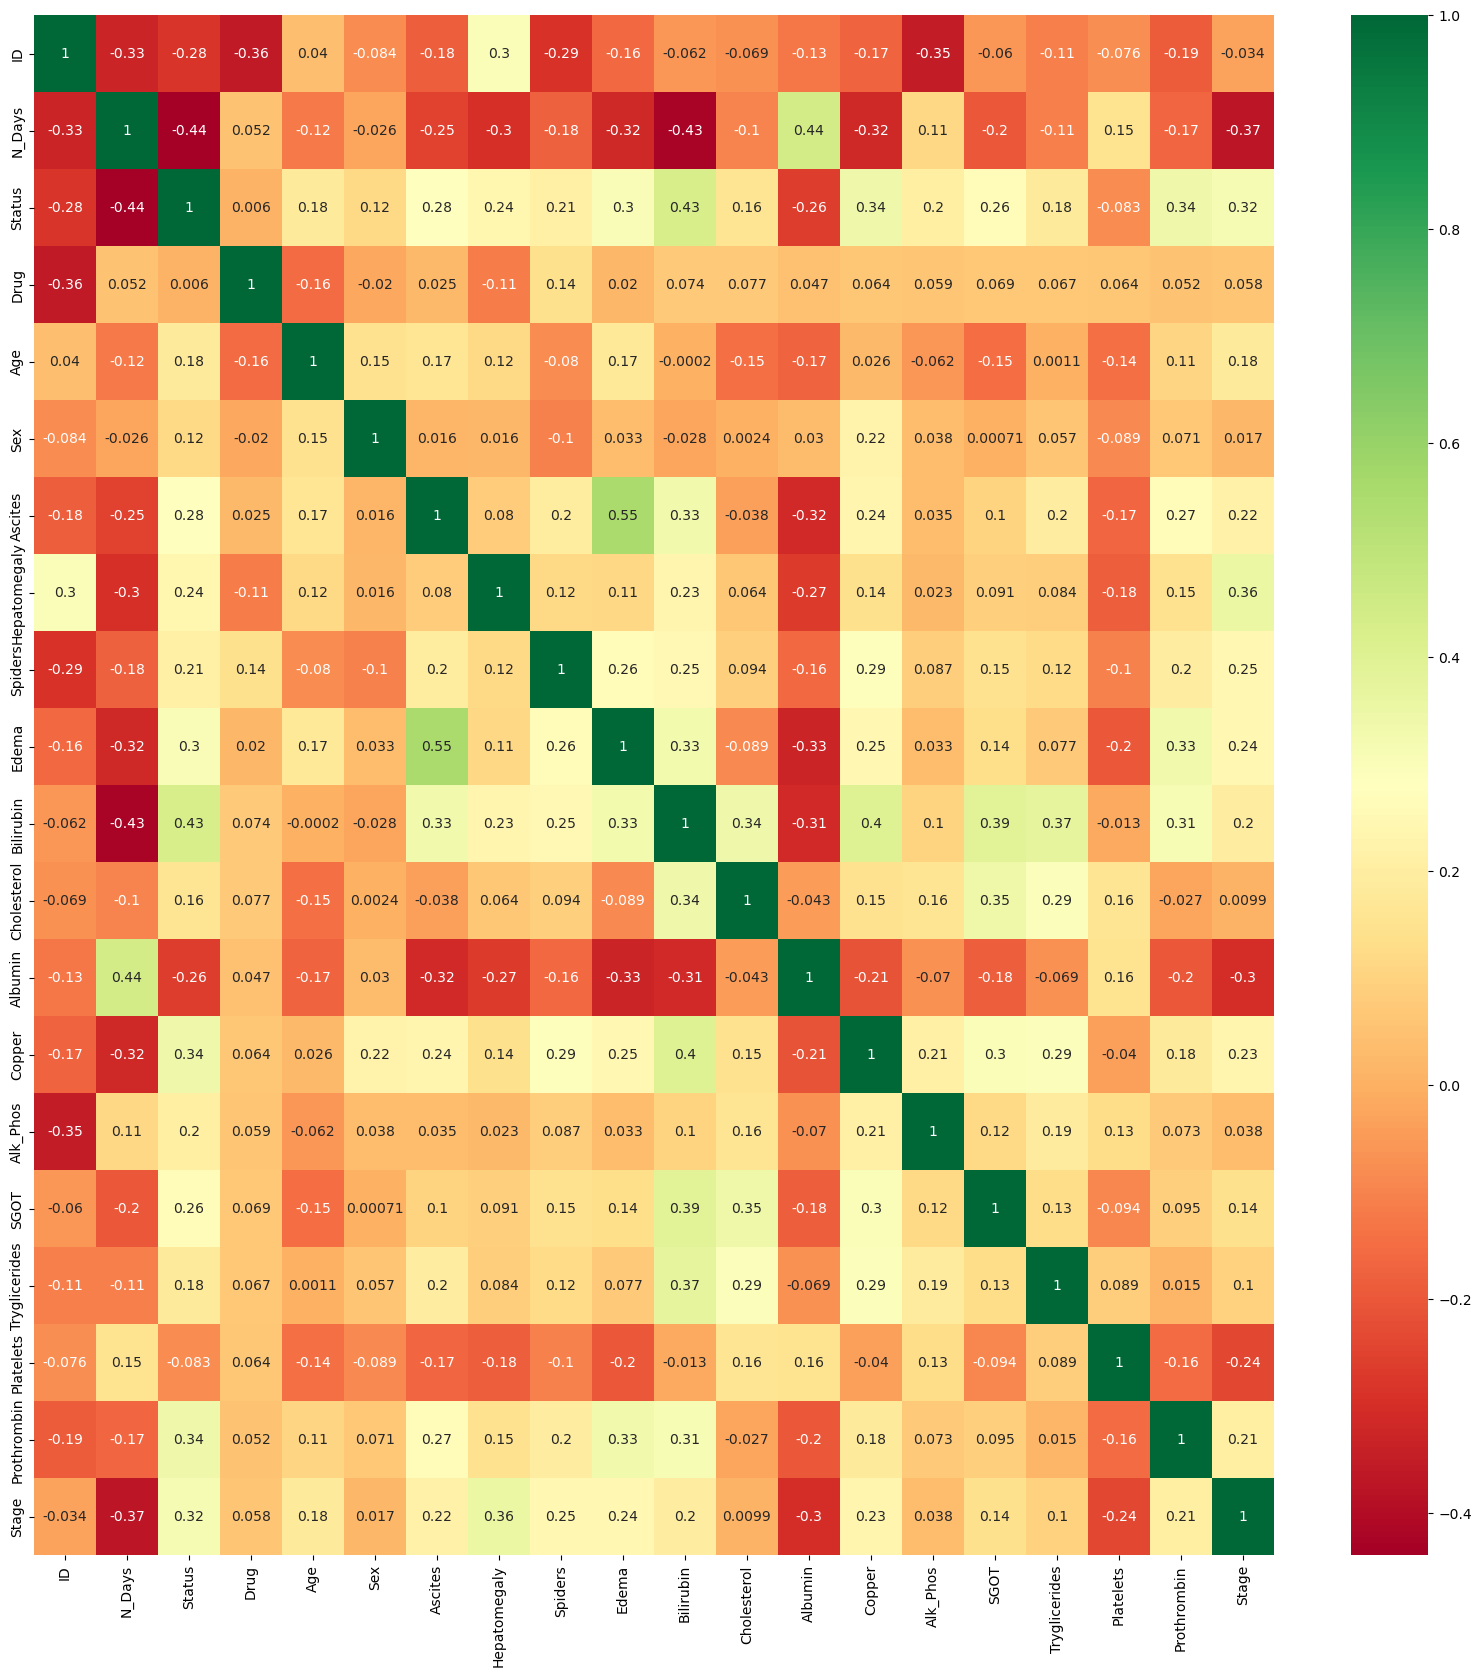

In [109]:
#Korelasi menggunakan heatmap
import seaborn as sns 

korelasi = data.corr()
features = korelasi.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")

In [110]:
#Show corellation in tables
data.corr()

ID    N_Days    Status      Drug       Age       Sex  \
ID             1.000000 -0.329850 -0.282416 -0.357086  0.040432 -0.083855   
N_Days        -0.329850  1.000000 -0.439399  0.051593 -0.119120 -0.026420   
Status        -0.282416 -0.439399  1.000000  0.006015  0.183308  0.118189   
Drug          -0.357086  0.051593  0.006015  1.000000 -0.157993 -0.019563   
Age            0.040432 -0.119120  0.183308 -0.157993  1.000000  0.145977   
Sex           -0.083855 -0.026420  0.118189 -0.019563  0.145977  1.000000   
Ascites       -0.182124 -0.253581  0.280903  0.024685  0.165093  0.015873   
Hepatomegaly   0.299714 -0.295464  0.235375 -0.113408  0.119454  0.016205   
Spiders       -0.289600 -0.178443  0.209041  0.142884 -0.080230 -0.103809   
Edema         -0.159830 -0.321081  0.303299  0.020110  0.173875  0.033229   
Bilirubin     -0.062154 -0.427603  0.429722  0.074236 -0.000200 -0.027652   
Cholesterol   -0.069327 -0.099846  0.161330  0.076928 -0.145461  0.002405   
Albumin       -0.128924  0.442185 -0.261674  0.047487 -0.174825  0.030351   
Copper        -0.171115 -0.319482  0.340345  0.063790  0.025571  0.222314   
Alk_Phos      -0.350981  0.113049  0.202924  0.058669 -0.062101  0.038026   
SGOT          -0.060318 -0.200029  0.258939  0.068560 -0.148916  0.000706   
Tryglicerides -0.110382 -0.108701  0.180992  0.067222  0.001146  0.056923   
Platelets     -0.076032  0.154097 -0.082971  0.064259 -0.144170 -0.089458   
Prothrombin   -0.191959 -0.169366  0.338382  0.051674  0.106679  0.070666   
Stage         -0.033911 -0.372745  0.317177  0.058495  0.179179  0.017356   

                Ascites  Hepatomegaly   Spiders     Edema  Bilirubin  \
ID            -0.182124      0.299714 -0.289600 -0.159830  -0.062154   
N_Days        -0.253581     -0.295464 -0.178443 -0.321081  -0.427603   
Status         0.280903      0.235375  0.209041  0.303299   0.429722   
Drug           0.024685     -0.113408  0.142884  0.020110   0.074236   
Age            0.165093      0.119454 -0.080230  0.173875  -0.000200   
Sex            0.015873      0.016205 -0.103809  0.033229  -0.027652   
Ascites        1.000000      0.079680  0.195960  0.552080   0.334283   
Hepatomegaly   0.079680      1.000000  0.117692  0.113423   0.234372   
Spiders        0.195960      0.117692  1.000000  0.263447   0.247932   
Edema          0.552080      0.113423  0.263447  1.000000   0.330803   
Bilirubin      0.334283      0.234372  0.247932  0.330803   1.000000   
Cholesterol   -0.038174      0.064480  0.093853 -0.089030   0.336882   
Albumin       -0.315648     -0.269351 -0.162071 -0.331281  -0.314177   
Copper         0.235302      0.144227  0.288117  0.246243   0.403761   
Alk_Phos       0.034538      0.023482  0.086869  0.033201   0.104675   
SGOT           0.101112      0.091103  0.145465  0.136048   0.392112   
Tryglicerides  0.197834      0.083989  0.122999  0.076551   0.370330   
Platelets     -0.167323     -0.182456 -0.102217 -0.202463  -0.012988   
Prothrombin    0.268142      0.147127  0.196611  0.331744   0.312007   
Stage          0.216645      0.356155  0.245199  0.243093   0.200314   

               Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
ID               -0.069327 -0.128924 -0.171115 -0.350981 -0.060318   
N_Days           -0.099846  0.442185 -0.319482  0.113049 -0.200029   
Status            0.161330 -0.261674  0.340345  0.202924  0.258939   
Drug              0.076928  0.047487  0.063790  0.058669  0.068560   
Age              -0.145461 -0.174825  0.025571 -0.062101 -0.148916   
Sex               0.002405  0.030351  0.222314  0.038026  0.000706   
Ascites          -0.038174 -0.315648  0.235302  0.034538  0.101112   
Hepatomegaly      0.064480 -0.269351  0.144227  0.023482  0.091103   
Spiders           0.093853 -0.162071  0.288117  0.086869  0.145465   
Edema            -0.089030 -0.331281  0.246243  0.033201  0.136048   
Bilirubin         0.336882 -0.314177  0.403761  0.104675  0.392112   
Cholesterol       1.000000 -0.043022  0.145910  0.

In [111]:
#statistika dasar
data.describe()

ID      N_Days      Status        Drug         Age         Sex  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean   208.500000  197.052632    0.830144    0.368421  176.428230    0.105263   
std    120.810458  114.711951    0.955785    0.482954   97.583099    0.307260   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    104.250000   99.250000    0.000000    0.000000   94.250000    0.000000   
50%    208.500000  195.500000    0.000000    0.000000  179.000000    0.000000   
75%    312.750000  294.750000    2.000000    1.000000  261.750000    0.000000   
max    417.000000  398.000000    2.000000    1.000000  343.000000    1.000000   

          Ascites  Hepatomegaly     Spiders       Edema   Bilirubin  \
count  418.000000    418.000000  418.000000  418.000000  418.000000   
mean     0.057416      0.636364    0.215311    0.200957    3.220813   
std      0.232915      0.481622    0.411530    0.506835    4.407506   
min      0.000000      0.000000    0.000000    0.000000    0.300000   
25%      0.000000      0.000000    0.000000    0.000000    0.800000   
50%      0.000000      1.000000    0.000000    0.000000    1.400000   
75%      0.000000      1.000000    0.000000    0.000000    3.400000   
max      1.000000      1.000000    1.000000    2.000000   28.000000   

       Cholesterol     Albumin      Copper      Alk_Phos        SGOT  \
count   418.000000  418.000000  418.000000    418.000000  418.000000   
mean    350.272727    3.497440   91.279904   1799.144976  120.564067   
std     193.123893    0.424972   74.485481   1875.121982   49.085094   
min     120.000000    1.960000    4.000000    289.000000   26.350000   
25%     273.000000    3.242500   51.250000   1016.250000   91.000000   
50%     309.500000    3.530000   73.000000   1259.000000  114.700000   
75%     347.750000    3.770000  100.750000   1707.750000  135.750000   
max    1775.000000    4.640000  588.000000  13862.400000  457.250000   

       Tryglicerides   Platelets  Prothrombin       Stage  
count     418.000000  418.000000   418.000000  418.000000  
mean      119.267943  256.866029    10.731100    2.023923  
std        54.050691   97.024861     1.019587    0.875678  
min        33.000000   62.000000     9.000000    0.000000  
25%        95.000000  190.000000    10.000000    1.000000  
50%       108.000000  251.000000    10.600000    2.000000  
75%       127.750000  315.500000    11.100000    3.000000  
max       598.000000  721.000000    18.000000    3.000000

In [112]:
#checking skewness dari data
cirhossis_true_count =len(data.loc[data['Stage']==4.0])
cirhossis_false_count = len(data.loc[data['Stage']==3.0])

In [113]:
#view
(cirhossis_true_count,cirhossis_false_count)

(0, 144)

In [114]:
#Missing value
print('total number of rows : {0}'.format(data.shape[1]))
print('total number of columns : {0}'.format(data.shape[0]))

total number of rows : 20
total number of columns : 418


In [115]:
data.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [116]:
print('Banyak baris nilai nol untuk id :{0}'.format(len(data.loc[data['ID']==0])))
print('Banyak baris nilai nol untuk n_days :{0}'.format(len(data.loc[data['N_Days']==0])))
print('Banyak baris nilai nol untuk status :{0}'.format(len(data.loc[data['Status']==0])))
print('Banyak baris nilai nol untuk obat :{0}'.format(len(data.loc[data['Drug']==0])))
print('Banyak baris nilai nol untuk usia :{0}'.format(len(data.loc[data['Age']==0])))
print('Banyak baris nilai nol untuk seks :{0}'.format(len(data.loc[data['Sex']==0])))
print('Banyak baris nilai nol untuk asites :{0}'.format(len(data.loc[data['Ascites']==0])))
print('Banyak baris nilai nol untuk hepatomegali :{0}'.format(len(data.loc[data['Hepatomegaly']==0])))
print('Banyak baris nilai nol untuk laba-laba :{0}'.format(len(data.loc[data['Spiders']==0])))
print('Banyak baris nilai nol untuk busung :{0}'.format(len(data.loc[data['Edema']==0])))
print('Banyak baris nilai nol untuk bilirubin :{0}'.format(len(data.loc[data['Bilirubin']==0])))
print('Banyak baris nilai nol untuk kolesterol :{0}'.format(len(data.loc[data['Cholesterol']==0])))
print('Banyak baris nilai nol untuk albumin :{0}'.format(len(data.loc[data['Albumin']==0])))
print('Banyak baris nilai nol untuk tembaga :{0}'.format(len(data.loc[data['Copper']==0])))
print('Banyak baris nilai nol untuk Alk_phos :{0}'.format(len(data.loc[data['Alk_Phos']==0])))
print('Banyak baris nilai nol untuk SGOT :{0}'.format(len(data.loc[data['SGOT']==0])))
print('Banyak baris nilai nol untuk trigliserida :{0}'.format(len(data.loc[data['Tryglicerides']==0])))
print('Banyak baris nilai nol untuk trombosit :{0}'.format(len(data.loc[data['Platelets']==0])))
print('Banyak baris nilai nol untuk protrombin :{0}'.format(len(data.loc[data['Prothrombin']==0])))

Banyak baris nilai nol untuk id :1
Banyak baris nilai nol untuk n_days :2
Banyak baris nilai nol untuk status :232
Banyak baris nilai nol untuk obat :264
Banyak baris nilai nol untuk usia :1
Banyak baris nilai nol untuk seks :374
Banyak baris nilai nol untuk asites :394
Banyak baris nilai nol untuk hepatomegali :152
Banyak baris nilai nol untuk laba-laba :328
Banyak baris nilai nol untuk busung :354
Banyak baris nilai nol untuk bilirubin :0
Banyak baris nilai nol untuk kolesterol :0
Banyak baris nilai nol untuk albumin :0
Banyak baris nilai nol untuk tembaga :0
Banyak baris nilai nol untuk Alk_phos :0
Banyak baris nilai nol untuk SGOT :0
Banyak baris nilai nol untuk trigliserida :0
Banyak baris nilai nol untuk trombosit :0
Banyak baris nilai nol untuk protrombin :0


In [117]:
data2 = data.copy()

In [118]:
#rata-rata
avg_id = data2['ID'].mean()
avg_n_days = data2['N_Days'].mean()
avg_status = data2['Status'].mean()
avg_drug = data2['Drug'].mean()
avg_seks = data2['Sex'].mean()
avg_asites = data2['Ascites'].mean()
avg_hepatomegali = data2['Hepatomegaly'].mean()
avg_laba = data2['Spiders'].mean()
avg_busung = data2['Edema'].mean()

In [119]:
#now replace avg to columns 
data2['ID'].replace({0:avg_id},inplace=True)
data2['N_Days'].replace({0:avg_n_days},inplace=True)
data2['Status'].replace({0:avg_status},inplace=True)
data2['Drug'].replace({0:avg_drug},inplace=True)
data2['Sex'].replace({0:avg_seks},inplace=True)
data2['Ascites'].replace({0:avg_asites},inplace=True)
data2['Hepatomegaly'].replace({0:avg_hepatomegali},inplace=True)
data2['Spiders'].replace({0:avg_laba},inplace=True)
data2['Edema'].replace({0:avg_busung},inplace=True)

In [120]:
print('Banyak baris nilai nol untuk id :{0}'.format(len(data2.loc[data2['ID']==0])))
print('Banyak baris nilai nol untuk n_days :{0}'.format(len(data2.loc[data2['N_Days']==0])))
print('Banyak baris nilai nol untuk status :{0}'.format(len(data2.loc[data2['Status']==0])))
print('Banyak baris nilai nol untuk obat :{0}'.format(len(data2.loc[data2['Drug']==0])))
print('Banyak baris nilai nol untuk usia :{0}'.format(len(data2.loc[data2['Age']==0])))
print('Banyak baris nilai nol untuk seks :{0}'.format(len(data2.loc[data2['Sex']==0])))
print('Banyak baris nilai nol untuk asites :{0}'.format(len(data2.loc[data2['Ascites']==0])))
print('Banyak baris nilai nol untuk hepatomegali :{0}'.format(len(data2.loc[data2['Hepatomegaly']==0])))
print('Banyak baris nilai nol untuk laba-laba :{0}'.format(len(data2.loc[data2['Spiders']==0])))
print('Banyak baris nilai nol untuk busung :{0}'.format(len(data2.loc[data2['Edema']==0])))
print('Banyak baris nilai nol untuk bilirubin :{0}'.format(len(data2.loc[data2['Bilirubin']==0])))
print('Banyak baris nilai nol untuk kolesterol :{0}'.format(len(data2.loc[data2['Cholesterol']==0])))
print('Banyak baris nilai nol untuk albumin :{0}'.format(len(data2.loc[data2['Albumin']==0])))
print('Banyak baris nilai nol untuk tembaga :{0}'.format(len(data2.loc[data2['Copper']==0])))
print('Banyak baris nilai nol untuk Alk_phos :{0}'.format(len(data2.loc[data2['Alk_Phos']==0])))
print('Banyak baris nilai nol untuk SGOT :{0}'.format(len(data2.loc[data2['SGOT']==0])))
print('Banyak baris nilai nol untuk trigliserida :{0}'.format(len(data2.loc[data2['Tryglicerides']==0])))
print('Banyak baris nilai nol untuk trombosit :{0}'.format(len(data2.loc[data2['Platelets']==0])))
print('Banyak baris nilai nol untuk protrombin :{0}'.format(len(data2.loc[data2['Prothrombin']==0])))

Banyak baris nilai nol untuk id :0
Banyak baris nilai nol untuk n_days :0
Banyak baris nilai nol untuk status :0
Banyak baris nilai nol untuk obat :0
Banyak baris nilai nol untuk usia :1
Banyak baris nilai nol untuk seks :0
Banyak baris nilai nol untuk asites :0
Banyak baris nilai nol untuk hepatomegali :0
Banyak baris nilai nol untuk laba-laba :0
Banyak baris nilai nol untuk busung :0
Banyak baris nilai nol untuk bilirubin :0
Banyak baris nilai nol untuk kolesterol :0
Banyak baris nilai nol untuk albumin :0
Banyak baris nilai nol untuk tembaga :0
Banyak baris nilai nol untuk Alk_phos :0
Banyak baris nilai nol untuk SGOT :0
Banyak baris nilai nol untuk trigliserida :0
Banyak baris nilai nol untuk trombosit :0
Banyak baris nilai nol untuk protrombin :0


c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

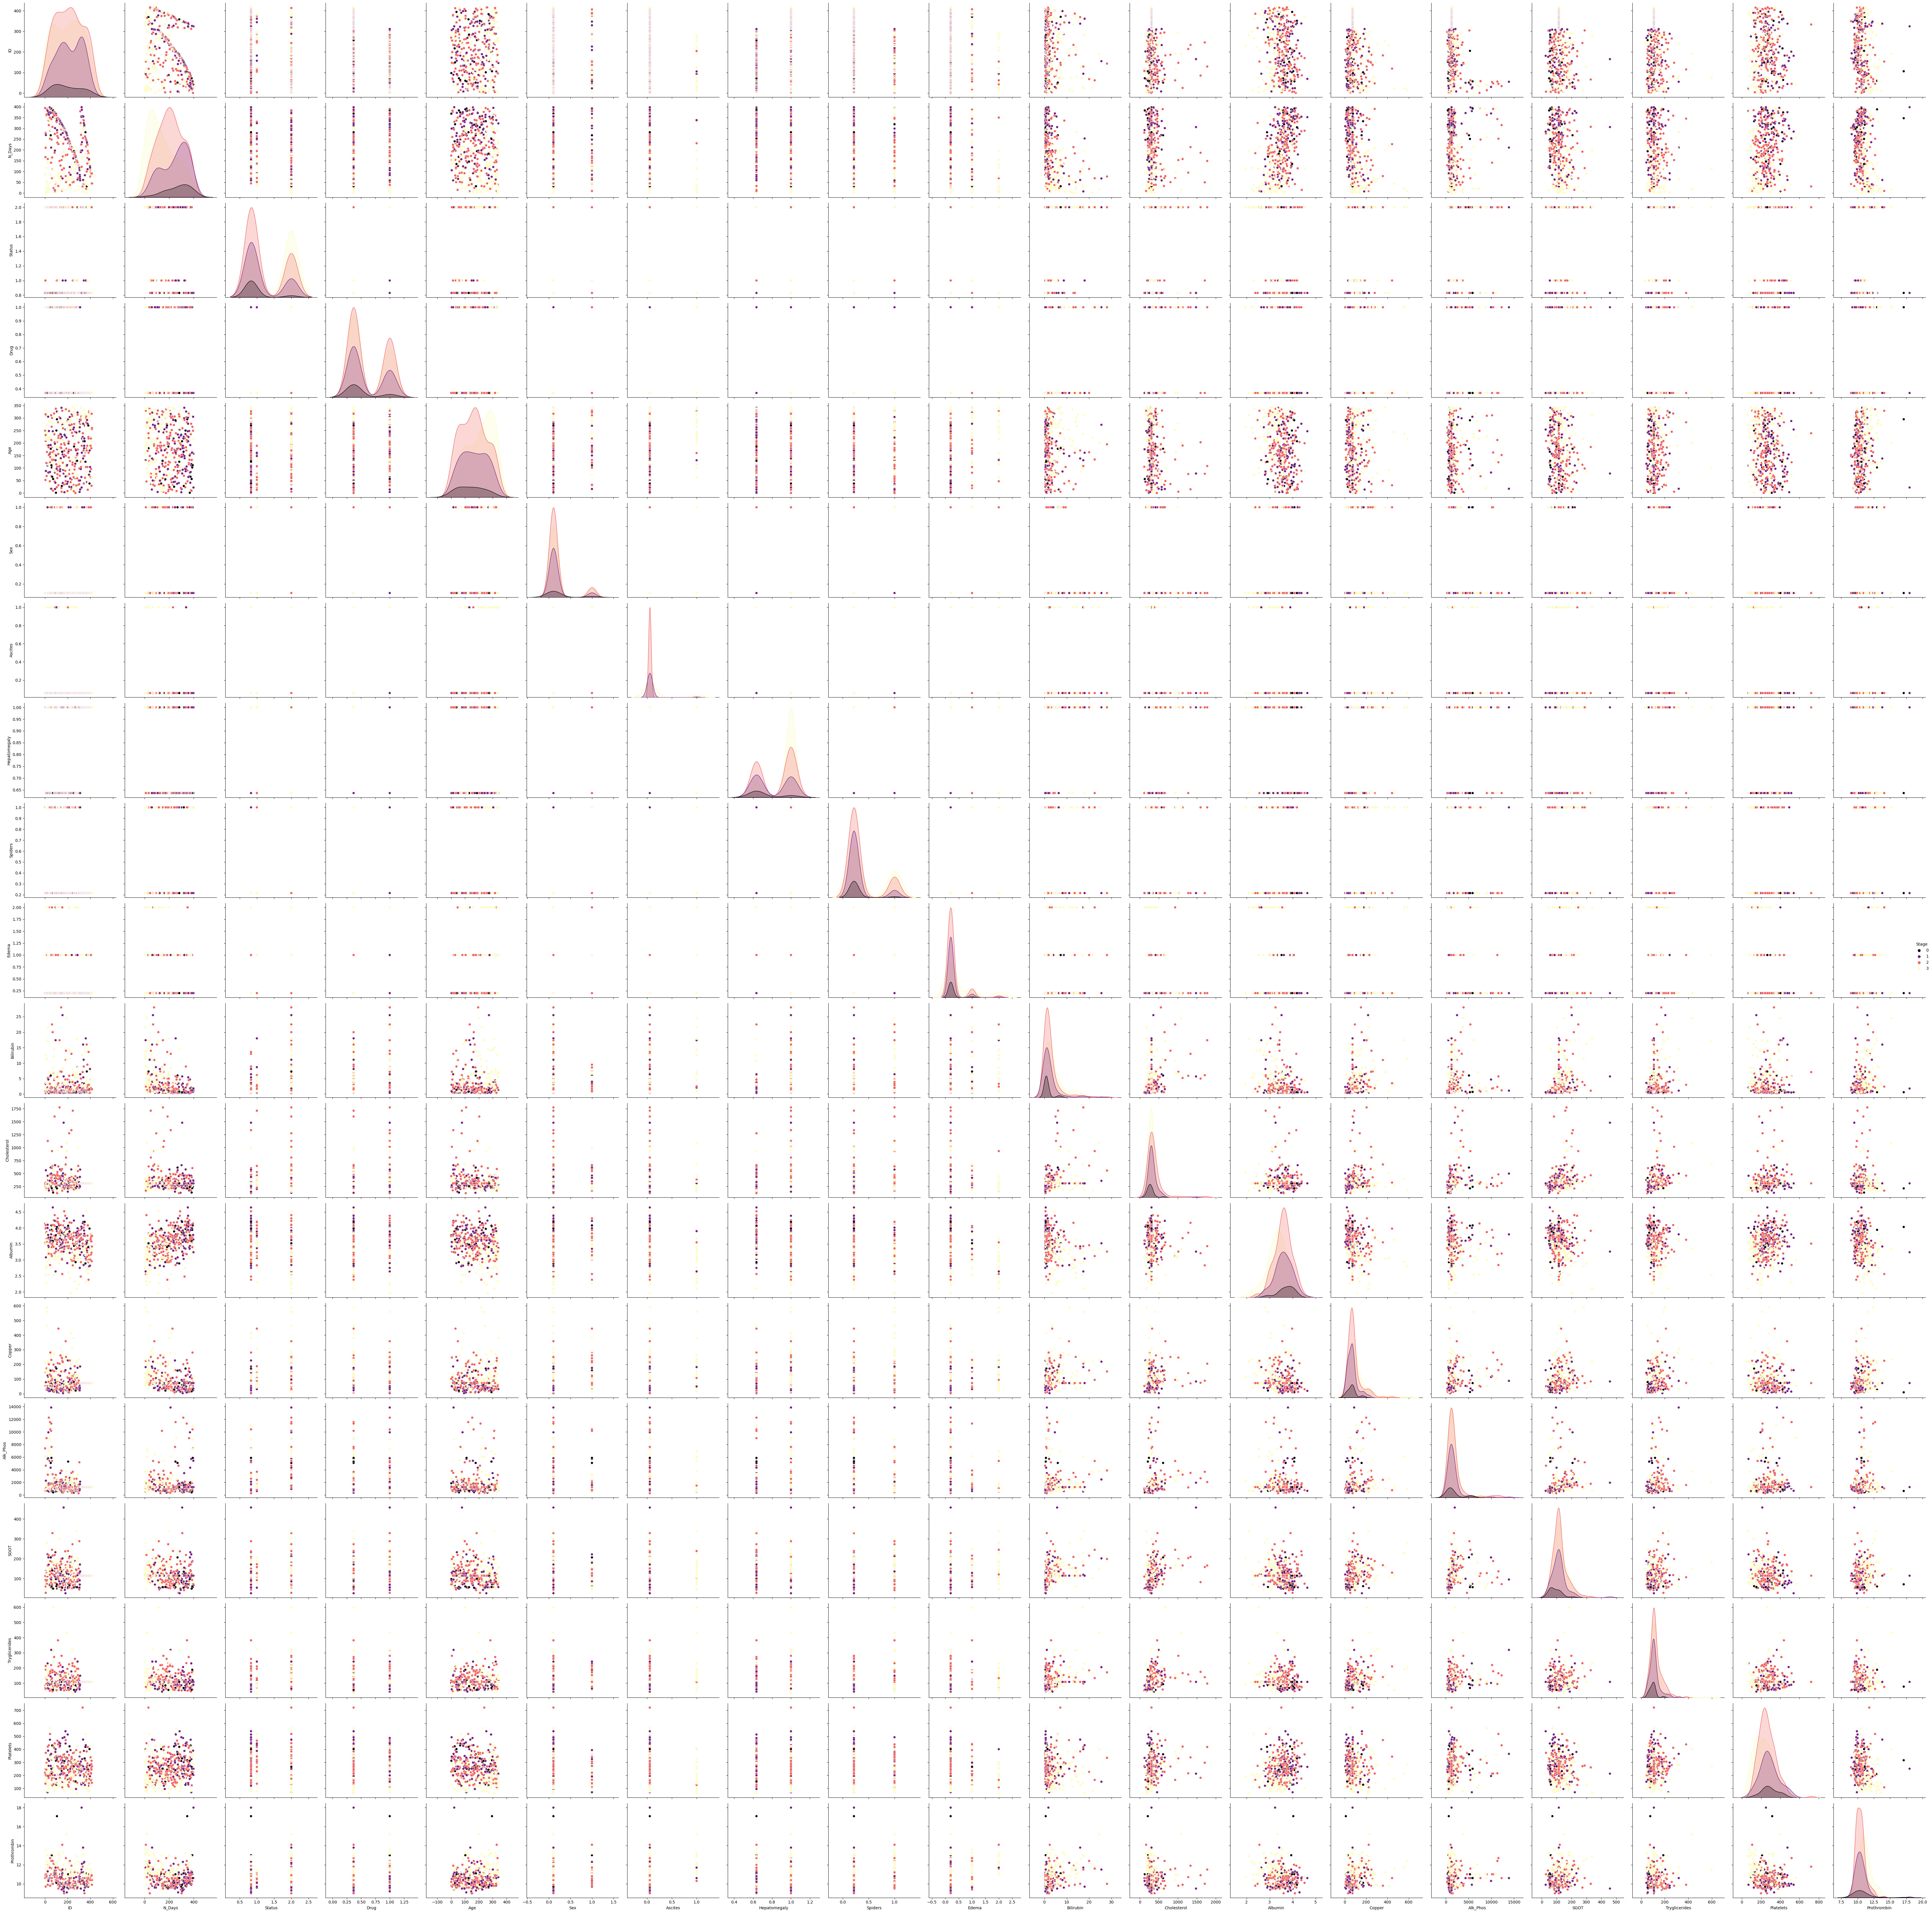

In [121]:
#make pairplot
sns.pairplot(data2,hue='Stage',palette='magma',height=3.5)
plt.tight_layout()

c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

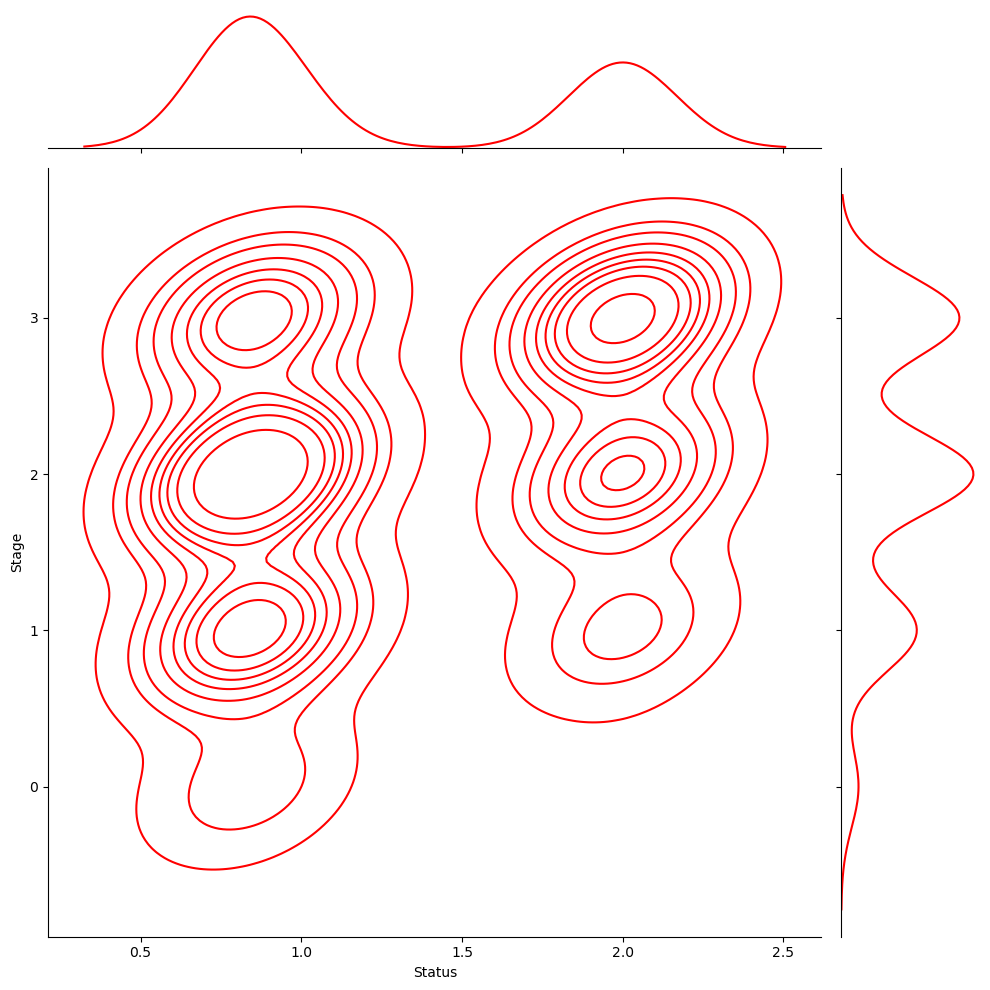

In [122]:
#joinplot
sns.jointplot(x='Status',y='Stage',data=data2,height=10,kind='kde',color='red')
plt.tight_layout()

## Apply Model

In [123]:
from sklearn.model_selection import train_test_split

X = data2.drop('Stage',axis=1)
y = data2['Stage']

In [124]:
X

ID  N_Days    Status      Drug  Age       Sex   Ascites  Hepatomegaly  \
0    208.5    29.0  2.000000  0.368421  267  0.105263  1.000000      1.000000   
1      1.0   394.0  0.830144  0.368421  249  0.105263  0.057416      1.000000   
2      2.0    87.0  2.000000  0.368421  333  1.000000  0.057416      0.636364   
3      3.0   216.0  2.000000  0.368421  223  0.105263  0.057416      1.000000   
4      4.0   167.0  1.000000  1.000000   52  0.105263  0.057416      1.000000   
..     ...     ...       ...       ...  ...       ...       ...           ...   
413  413.0    44.0  2.000000  0.368421  317  0.105263  0.057416      1.000000   
414  414.0   102.0  0.830144  0.368421   61  0.105263  0.057416      1.000000   
415  415.0    91.0  0.830144  0.368421  256  0.105263  0.057416      1.000000   
416  416.0    45.0  0.830144  0.368421  260  0.105263  0.057416      1.000000   
417  417.0    80.0  0.830144  0.368421  207  0.105263  0.057416      1.000000   

      Spiders     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0    1.000000  2.000000       14.5        261.0     2.60   156.0    1718.0   
1    1.000000  0.200957        1.1        302.0     4.14    54.0    7394.8   
2    0.215311  1.000000        1.4        176.0     3.48   210.0     516.0   
3    1.000000  1.000000        1.8        244.0     2.54    64.0    6121.8   
4    1.000000  0.200957        3.4        279.0     3.53   143.0     671.0   
..        ...       ...        ...          ...      ...     ...       ...   
413  0.215311  0.200957        1.2        309.5     2.96    73.0    1259.0   
414  0.215311  0.200957        0.9        309.5     3.83    73.0    1259.0   
415  0.215311  0.200957        1.6        309.5     3.42    73.0    1259.0   
416  0.215311  0.200957        0.8        309.5     3.75    73.0    1259.0   
417  0.215311  0.200957        0.7        309.5     3.29    73.0    1259.0   

       SGOT  Tryglicerides  Platelets  Prothrombin  
0    137.95          172.0      190.0         12.2  
1    113.52           88.0      221.0         10.6  
2     96.10           55.0      151.0         12.0  
3     60.63           92.0      183.0         10.3  
4    113.15           72.0      136.0         10.9  
..      ...            ...        ...          ...  
413  114.70          108.0      174.0         10.9  
414  114.70          108.0      180.0         11.2  
415  114.70          108.0      143.0          9.9  
416  114.70          108.0      269.0         10.4  
417  114.70          108.0      350.0         10.6  

[418 rows x 19 columns]

In [125]:
y

0      3
1      2
2      3
3      3
4      2
      ..
413    2
414    3
415    2
416    2
417    3
Name: Stage, Length: 418, dtype: int64

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [127]:
X_train

ID  N_Days    Status      Drug  Age       Sex   Ascites  Hepatomegaly  \
336  336.0   255.0  2.000000  0.368421  239  0.105263  0.057416      1.000000   
31    31.0   396.0  0.830144  1.000000  217  0.105263  0.057416      1.000000   
84    84.0   346.0  2.000000  1.000000  141  0.105263  0.057416      1.000000   
287  287.0    92.0  1.000000  1.000000  158  0.105263  0.057416      1.000000   
317  317.0   190.0  0.830144  0.368421   96  0.105263  0.057416      1.000000   
..     ...     ...       ...       ...  ...       ...       ...           ...   
71    71.0   382.0  0.830144  1.000000    9  0.105263  0.057416      0.636364   
106  106.0   347.0  0.830144  1.000000  295  0.105263  0.057416      0.636364   
270  270.0   175.0  0.830144  1.000000  176  0.105263  0.057416      1.000000   
348  348.0   316.0  0.830144  0.368421  218  0.105263  0.057416      1.000000   
102  102.0     6.0  2.000000  1.000000  159  0.105263  1.000000      1.000000   

      Spiders     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
336  0.215311  0.200957        1.8        309.5     3.64    73.0    1259.0   
31   0.215311  0.200957        1.8        262.0     3.34   101.0    7277.0   
84   0.215311  0.200957        2.1        262.0     3.48    58.0    2045.0   
287  0.215311  1.000000        8.7        310.0     3.89   107.0     637.0   
317  0.215311  0.200957        0.7        309.5     3.68    73.0    1259.0   
..        ...       ...        ...          ...      ...     ...       ...   
71   0.215311  0.200957        0.5        320.0     3.54    51.0    1243.0   
106  0.215311  0.200957        0.6        212.0     4.03    10.0     648.0   
270  0.215311  0.200957        1.0        321.0     3.50    94.0     955.0   
348  0.215311  0.200957        1.4        309.5     3.82    73.0    1259.0   
102  1.000000  2.000000        2.5        188.0     3.67    57.0    1273.0   

       SGOT  Tryglicerides  Platelets  Prothrombin  
336  114.70          108.0      141.0         10.0  
31    82.56          158.0      286.0         10.6  
84    89.90           84.0      225.0         11.5  
287  117.00          242.0      298.0          9.6  
317  114.70          108.0      306.0          9.5  
..      ...            ...        ...          ...  
71   122.45           80.0      225.0         10.0  
106   71.30           77.0      316.0         17.1  
270  111.00          177.0      289.0          9.7  
348  114.70          108.0      249.0         10.3  
102  119.35          102.0      110.0         11.1  

[334 rows x 19 columns]

In [128]:
X_train.shape

(334, 19)

In [129]:
y_train.shape

(334,)

In [130]:
X_test

ID  N_Days    Status      Drug  Age       Sex   Ascites  Hepatomegaly  \
321  321.0   225.0  2.000000  0.368421  306  0.105263  0.057416      1.000000   
324  324.0   398.0  0.830144  0.368421   22  0.105263  0.057416      1.000000   
388  388.0   177.0  0.830144  0.368421  317  0.105263  0.057416      1.000000   
56    56.0   343.0  2.000000  0.368421  212  0.105263  0.057416      1.000000   
153  153.0    10.0  2.000000  0.368421  329  1.000000  0.057416      0.636364   
..     ...     ...       ...       ...  ...       ...       ...           ...   
57    57.0   392.0  0.830144  0.368421  111  1.000000  0.057416      0.636364   
126  126.0   342.0  0.830144  1.000000  106  0.105263  0.057416      0.636364   
24    24.0   381.0  0.830144  1.000000  116  0.105263  0.057416      0.636364   
17    17.0     9.0  2.000000  0.368421  216  0.105263  0.057416      1.000000   
66    66.0   307.0  2.000000  1.000000  184  0.105263  0.057416      0.636364   

      Spiders     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
321  0.215311  0.200957        1.1        309.5     3.69    73.0    1259.0   
324  0.215311  0.200957        1.8        309.5     3.24    73.0    1259.0   
388  0.215311  0.200957        0.7        309.5     3.06    73.0    1259.0   
56   0.215311  1.000000        2.3        260.0     3.18   231.0   11320.2   
153  1.000000  2.000000        2.4        168.0     2.56   225.0    1056.0   
..        ...       ...        ...          ...      ...     ...       ...   
57   0.215311  0.200957        0.7        242.0     4.08    73.0    5890.0   
126  0.215311  0.200957        0.5        268.0     4.08     9.0    1174.0   
24   0.215311  0.200957        0.7        298.0     4.10    40.0     661.0   
17   1.000000  2.000000       11.4        178.0     2.80   588.0     961.0   
66   0.215311  0.200957        1.1        466.0     3.91    84.0    1787.0   

       SGOT  Tryglicerides  Platelets  Prothrombin  
321  114.70          108.0      139.0         10.5  
324  114.70          108.0      251.0         18.0  
388  114.70          108.0      165.0         10.0  
56   105.78           94.0      216.0         12.4  
153  120.90           75.0      108.0         14.1  
..      ...            ...        ...          ...  
57    56.76          118.0      251.0         10.6  
126   86.80           95.0      453.0         10.0  
24   106.95           66.0      324.0         11.3  
17   280.55          200.0      283.0         12.4  
66   328.60          185.0      261.0         10.0  

[84 rows x 19 columns]

In [131]:
y_test

321    2
324    1
388    3
56     2
153    2
      ..
57     0
126    1
24     1
17     3
66     2
Name: Stage, Length: 84, dtype: int64

## Training

In [132]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier_model = RandomForestClassifier()

In [133]:
RandomForestClassifier_model.fit(X_train,y_train)

RandomForestClassifier()

In [134]:
RandomForestClassifier_prediction = RandomForestClassifier_model.predict(X_test)

In [135]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

print(confusion_matrix(y_test,RandomForestClassifier_prediction))

[[ 0  1  2  0]
 [ 0  2 12  2]
 [ 0  2 25  7]
 [ 0  0 13 18]]


In [136]:
print(classification_report(y_test,RandomForestClassifier_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      0.12      0.19        16
           2       0.48      0.74      0.58        34
           3       0.67      0.58      0.62        31

    accuracy                           0.54        84
   macro avg       0.39      0.36      0.35        84
weighted avg       0.52      0.54      0.50        84



c:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Save Model

In [137]:
import pickle

pickle.dump(RandomForestClassifier_model,open('SVC.pkl','wb'))